In [1]:
import os,cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [7]:
train_dir = './training/'
test_dir = 'testing/'
validation_dir = 'valid/'
IMAGE_SIZE = 100

In [9]:
# TRAINING IMAGE DATA GENERATOR
train_batches = ImageDataGenerator().flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE), 
    classes=['other','hotdog'], 
    batch_size=10
)

# TESTING IMAGE DATA GENERATOR
test_batches = ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE), 
    classes=['hotdog','other'], 
    batch_size=1
)

# VALIDATION IMAGE DATA GENERATOR
validation_batches = ImageDataGenerator().flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE), 
    classes=['hotdog','other'], 
    batch_size=1
)

Found 74 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 ==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=14)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

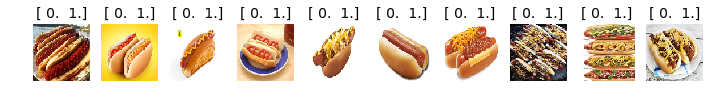

In [6]:
plots(imgs, titles=labels)